In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environment import TicTacToeEnv as ttte

## Let's play a game

In [2]:
# To show how the game went at the end of the episode
game_state_images = []
game_state_rewards = []

In [3]:
# Initialize the board
board = ttte()

# Just like gym, resetting the environment to get the initial observations
print(board.reset())

[[0 0 0]
 [0 0 0]
 [0 0 0]]


**Side Note** -
The numbers inside the array correlate to the game as follows:

| Number | Definition                |
|--------|---------------------------|
| 0      | Empty Cell                |
| 1      | Player X - User           |
| 2      | Player O - Random Agent   |

In [4]:
# Storing image
game_state_images.append(board.render_image)

# Unique value for the current positions
print(board.state_hash)

60ad80569e28127bef557543fe46677f


In [5]:
# Possible positions I can play on
print(board.action_space)

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]


In [6]:
# Let's hit on the center - [1,1]
hit = board.step(np.array([1,1]))
game_state_rewards.append(hit[1])
print(hit)

(array([[2, 0, 0],
       [0, 1, 0],
       [0, 0, 0]]), -0.1, False)


Let's analyze what was returned from the step function:

```python
board.step(action):
    """ Steps onto another state as defined by the given action
    @return 3-tuple (new_state, reward_for_current_action, is_episode_over)
    """
```

Hence it returns the following:
- New Board State (Numpy Array)
- Reward for this action we just took
- True/False on if the Episode is finished or not (Termination)

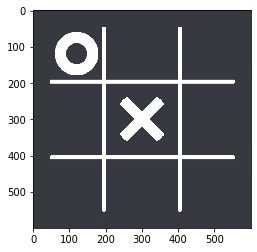

In [7]:
# It may help to see what the current situation is, in the game
plt.imshow(board.render_image)

In [8]:
# Storing image
game_state_images.append(board.render_image)

# Unique value for the current positions
print(board.state_hash)

e7b297b2ad2e23a6b0f7785136ab65a7


In [9]:
# Let's keep on playing
hit = board.step(np.array([0,0]))
game_state_rewards.append(hit[1])
print(hit)
game_state_images.append(board.render_image)

(array([[2, 0, 0],
       [0, 1, 0],
       [0, 0, 0]]), -0.9, False)


In [10]:
hit = board.step(np.array([2,0]))
game_state_rewards.append(hit[1])
print(hit)
game_state_images.append(board.render_image)

(array([[2, 0, 0],
       [0, 1, 0],
       [1, 0, 2]]), -0.1, False)


In [11]:
hit = board.step(np.array([0,2]))
game_state_rewards.append(hit[1])
print(hit)
game_state_images.append(board.render_image)

(array([[2, 0, 1],
       [0, 1, 0],
       [1, 0, 2]]), 1.0, True)


As the last value returned was `True`, episode is over, let's traverse through the episode, step by step

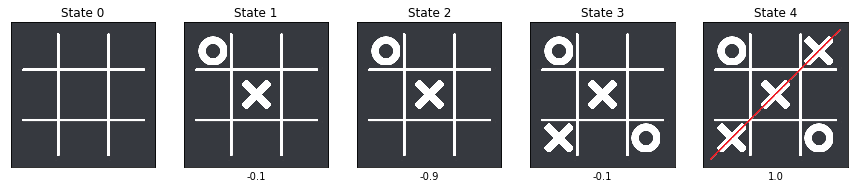

In [12]:
# Drawing the images

plt.subplots(figsize=(15,15))
for i in range(len(game_state_images)):
    plt.subplot(1,5,i+1)
    plt.title("State %d"%i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(game_state_images[i])
    if i>0:    plt.xlabel(game_state_rewards[i-1]) # Reward

### The Reward values are as follows:

|Reward |State                          |
|-------|-------------------------------|
|-1     |Environment (Random Player) Win|
|-0.9   |Wrong position (already filled)|
|-0.1   |Nothing happened               |
|0      |Tie                            |
|1      |Agent (Player) Wins            |

Also, Rendering images takes some time. So, try to render images after some set interval to see how your model is trianing.